In [1]:
import numpy as np
import sncosmo
from astropy import constants as const
from astropy import units as u
from astropy.cosmology import WMAP9 as cosmo
import yaml
import matplotlib.pyplot as plt

c = const.c.cgs
h = const.h.cgs
k_B = const.k_B.cgs
with open ('../scripts/CONFIG.yml', 'r') as config_file:
    config = yaml.safe_load(config_file)

base_dir = config['base_dir']


In [2]:
lbda_g = 4.686e-5
nu_g = c.value/lbda_g
L_g = np.array([10**42.3, 10**42.7])
z = np.array([0.326, 0.370])

In [3]:
parsec = 3.08568e18 # cm
parsec_in_cm = parsec 
abs_const = 4*np.pi* 3631e-23 *  (10*parsec_in_cm)**2
-2.5*np.log10(L_g/(abs_const*nu_g))

array([-17.14010924, -18.14010924])

In [4]:
def lum_to_mag(L_g):
    parsec = 3.08568e18 # cm
    abs_const = 4*np.pi* 3631e-23 *  (10*parsec_in_cm)**2
    return -2.5*np.log10(L_g/(abs_const*nu_g))

def mag_to_lum(M):
    parsec = 3.08568e18
    abs_const = 4*np.pi* 3631e-23 *  (10*parsec_in_cm)**2
    return (abs_const*nu_g)*10**(M/(-2.5))

In [5]:
mag_to_lum(-19.5)

1.7537040414985433e+43

In [6]:
# z = np.array([0.212, 0.340, 0.0914, 0.326])
# d = np.array([cosmo.luminosity_distance(a).to('cm').value for a in z])
# pc_to_cm = 3.086e19 # 10 parsec in cm
# f_g = L_g * (1+z) / (4 * np.pi * d**2)
# f_nu = f_g / (nu_g/(1+z))
# m = -2.5*np.log10(f_nu) - 48.6
# m_abs = m - 5*np.log10(d/pc_to_cm)
# print(m, m_abs)

In [7]:
# def lum_function(L_BB):
#     L_BK = 1.46e44 #erg s^-1 Hz^-1
#     coeff = 5.72e-8 #Mpc^-3 yr^-1
#     ratio = L_BB/L_BK
    
#     return coeff * ( (ratio**0.84) + (ratio**1.93) )**-1

def lum_function(L_BB):
    L0 = 1e43 #erg s^-1 Hz^-1
    coeff = 9.43e-7 #Mpc^-3 yr^-1
    ratio = L_BB/L0
    
    return coeff * (ratio**-1.41)

In [8]:
x = np.logspace(42.5, 44.6, 100)
y = lum_function(x)

Text(0, 0.5, 'rate [Mpc$^{-3}$yr$^{-1}$dex$^{-1}$]')

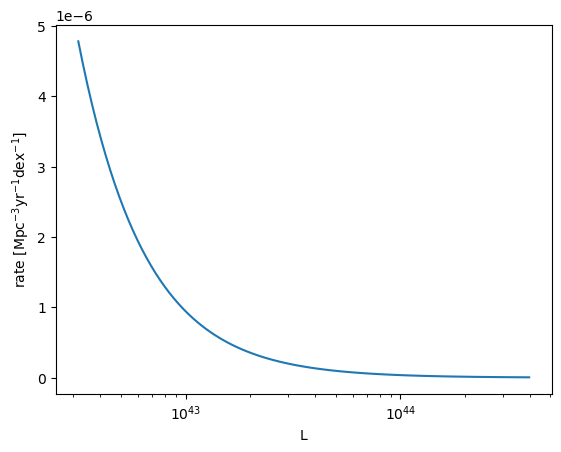

In [9]:
plt.plot(x, y)
plt.xscale('log')
plt.xlabel('L')
plt.ylabel('rate [Mpc$^{-3}$yr$^{-1}$dex$^{-1}$]')

In [10]:
x = np.logspace(43, 45, 100)
y = lum_function(x)

In [11]:
from scipy import integrate
y_int = [integrate.trapezoid(y[:i], np.log10(x[:i])) for i in range(len(y))]
y_int

[0.0,
 0.0,
 1.8445802892044362e-08,
 3.57205904442016e-08,
 5.1898703520584625e-08,
 6.70497635218725e-08,
 8.123897199623605e-08,
 9.4527391229731e-08,
 1.0697220702365634e-07,
 1.1862697478974748e-07,
 1.2954185002219342e-07,
 1.3976380413838582e-07,
 1.493368266171895e-07,
 1.583021143046495e-07,
 1.666982487017941e-07,
 1.7456136199747983e-07,
 1.8192529256078963e-07,
 1.8882173056213463e-07,
 1.9528035434973032e-07,
 2.0132895816833369e-07,
 2.069935717698685e-07,
 2.1229857243068626e-07,
 2.1726678985749212e-07,
 2.2191960443343085e-07,
 2.2627703922709807e-07,
 2.3035784616044358e-07,
 2.3417958670638202e-07,
 2.3775870746338772e-07,
 2.4111061093230403e-07,
 2.442497217999498e-07,
 2.471895490147704e-07,
 2.4994274392167134e-07,
 2.5252115470621403e-07,
 2.5493587738246905e-07,
 2.5719730354395583e-07,
 2.5931516508314767e-07,
 2.6129857607200755e-07,
 2.631560719837711e-07,
 2.6489564642477064e-07,
 2.6652478553437215e-07,
 2.680505002010628e-07,
 2.69479356233329e-07,
 2.708

Text(0, 0.5, 'volumetric rate [Mpc$^{-3}$yr$^{-1}$]')

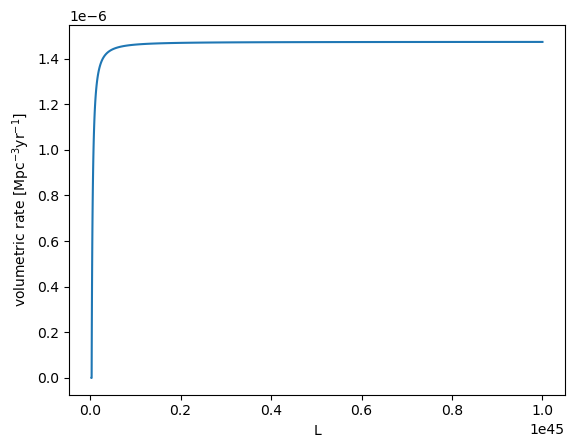

In [41]:
plt.plot(x, y_int)
plt.xlabel('L')
plt.ylabel('volumetric rate [Mpc$^{-3}$yr$^{-1}$]')

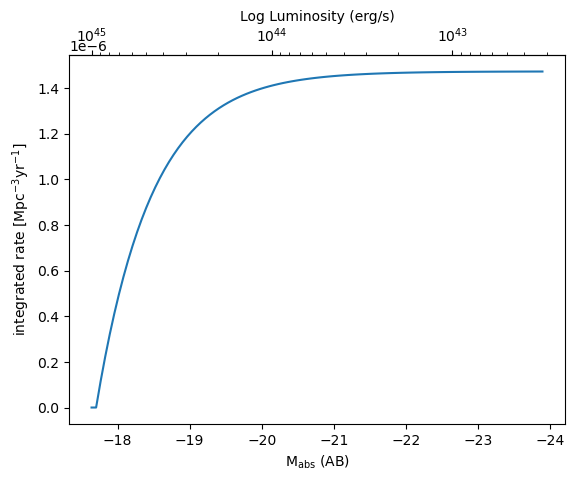

In [65]:
fig, ax = plt.subplots()


ax.plot(lum_to_mag(x), y_int)
ax.invert_xaxis()
ax.set_xlabel('M$_{\\rm{abs}}$ (AB)')
ax.set_ylabel('integrated rate [Mpc$^{-3}$yr$^{-1}$]')
ax2 = ax.secondary_xaxis("top", functions=(mag_to_lum, lum_to_mag))
ax2.set_xscale('log')
ax2.set_xlabel('Log Luminosity (erg/s)')

plt.savefig('../figures/ab_mag.png', dpi = 300)
plt.show()

In [18]:
def int_lum_function(L_BB):
    L0 = 1e43 #erg s^-1 Hz^-1
    coeff = 9.43e-7 #Mpc^-3 yr^-1
    ratio = L_BB/L0
    ratio_lower = 1
    const = coeff * L0* (1/-0.41)
    
    return coeff * L0* (1/-0.41) *(ratio**-0.41) - const

In [19]:
int_lum_function(1e45)

1.951880912859672e+37